In [1]:
# в dataset лежат 3 файла, статусы и 2 файла - метрики (аттрибуты) от поставщика
# нужно для каждого статуса в отдельности провести анализ данных на предмет поиска взимосвязей и влияний метрик от поставщиа н наши статусы

In [2]:
import pandas as pd                      # подключаем библиотеку pandas для работы с таблицами
import numpy as np                       # подключаем библиотеку numpy
from matplotlib import pyplot as plt     # подключаем библиотеку pyplot для построения графиков
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [3]:
response = pd.read_csv('dataset/result.response.csv')
response = response.drop(columns=['msisdn','request_date'])

In [4]:
response.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29706 entries, 0 to 29705
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ALL_CLC       29706 non-null  float64
 1   BIN1          29706 non-null  float64
 2   BIN2          29706 non-null  float64
 3   BLOCK_CNT     29706 non-null  float64
 4   BLOCK_DUR     29706 non-null  float64
 5   CIRCLE        29706 non-null  float64
 6   LIFETIME_BIN  29706 non-null  float64
 7   PAY_MAX       29706 non-null  float64
 8   SCORE1        29706 non-null  float64
 9   SCORE2        29706 non-null  float64
 10  SCORE3        29706 non-null  float64
 11  SCORE4        29706 non-null  float64
 12  SCORE5        29706 non-null  float64
 13  id            29706 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 3.2 MB


In [5]:
response_geo = pd.read_csv('dataset/result.response_geo.csv')
response_geo = response_geo.drop(columns=['msisdn','request_date'])

In [6]:
response_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29706 entries, 0 to 29705
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bad_address_home  29706 non-null  float64
 1   id                29706 non-null  int64  
 2   is_home1000_v1    29706 non-null  float64
 3   is_home1000_v2    29706 non-null  float64
 4   is_home100_v1     29706 non-null  float64
 5   is_home100_v2     29706 non-null  float64
 6   is_home2000_v1    29706 non-null  float64
 7   is_home2000_v2    29706 non-null  float64
 8   is_home500_v1     29706 non-null  float64
 9   is_home500_v2     29706 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


In [7]:
special_df = pd.read_csv('dataset/special_df_num1_numonline_1cnt_None.csv', sep=';')

In [8]:
special_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   app_id     2901 non-null   int64  
 1   status_3   2901 non-null   float64
 2   status_20  2788 non-null   float64
 3   status_30  2752 non-null   float64
 4   status_60  2114 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 113.4 KB


In [9]:
responses = pd.merge(response,\
                     response_geo,\
                     on=['id'])
responses.shape

(29706, 23)

In [10]:
responses.rename(columns={'id': 'app_id'}, inplace=True)

In [11]:
special_responses_df = pd.merge(special_df,\
                                responses,\
                                on='app_id')

In [12]:
special_responses_df

,app_id,status_3,status_20,status_30,status_60,ALL_CLC,BIN1,BIN2,BLOCK_CNT,BLOCK_DUR,...,SCORE5,bad_address_home,is_home1000_v1,is_home1000_v2,is_home100_v1,is_home100_v2,is_home2000_v1,is_home2000_v2,is_home500_v1,is_home500_v2
0,20,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.051611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,1.0,1.0,1.0,1.0,2.0,1.0,-1.0,0.0,1.0,...,-1.000000,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,25,1.0,1.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,-1.000000,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,26,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,4.0,...,0.513659,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,34,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.144622,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,29929,1.0,NaN,NaN,NaN,4.0,1.0,0.0,0.0,0.0,...,0.516248,0.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,1.0
2897,29842,1.0,NaN,NaN,NaN,1.0,1.0,0.0,1.0,1.0,...,0.442295,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2898,29959,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,0.0,...,0.530549,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2899,29879,0.0,NaN,NaN,NaN,2.0,1.0,-1.0,3.0,4.0,...,-1.000000,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [13]:
special_responses_df.isna().any()

app_id              False
status_3            False
status_20            True
status_30            True
status_60            True
ALL_CLC             False
BIN1                False
BIN2                False
BLOCK_CNT           False
BLOCK_DUR           False
CIRCLE              False
LIFETIME_BIN        False
PAY_MAX             False
SCORE1              False
SCORE2              False
SCORE3              False
SCORE4              False
SCORE5              False
bad_address_home    False
is_home1000_v1      False
is_home1000_v2      False
is_home100_v1       False
is_home100_v2       False
is_home2000_v1      False
is_home2000_v2      False
is_home500_v1       False
is_home500_v2       False
dtype: bool

## Ниже задаём желаемый статус

In [14]:
current_status = 'status_3'

In [15]:
list_to_remove = []
for i in special_responses_df.columns:
    if ('status_' in i) & (i!=current_status):
        list_to_remove.append(i)

print('Удаляем следующие атрибуты:')
print(list_to_remove)

Удаляем следующие атрибуты:
['status_20', 'status_30', 'status_60']


In [16]:
main_df = special_responses_df.drop(columns=list_to_remove)


main_df.dropna(inplace=True)
main_df

,app_id,status_3,ALL_CLC,BIN1,BIN2,BLOCK_CNT,BLOCK_DUR,CIRCLE,LIFETIME_BIN,PAY_MAX,...,SCORE5,bad_address_home,is_home1000_v1,is_home1000_v2,is_home100_v1,is_home100_v2,is_home2000_v1,is_home2000_v2,is_home500_v1,is_home500_v2
0,20,0.0,1.0,1.0,0.0,1.0,0.0,4.0,4.0,3.0,...,0.051611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,1.0,2.0,1.0,-1.0,0.0,1.0,5.0,2.0,3.0,...,-1.000000,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,25,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,3.0,0.0,...,-1.000000,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,26,0.0,2.0,1.0,1.0,2.0,4.0,5.0,5.0,3.0,...,0.513659,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,34,0.0,3.0,1.0,0.0,0.0,0.0,4.0,5.0,5.0,...,0.144622,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,29929,1.0,4.0,1.0,0.0,0.0,0.0,5.0,5.0,4.0,...,0.516248,0.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,1.0
2897,29842,1.0,1.0,1.0,0.0,1.0,1.0,5.0,5.0,3.0,...,0.442295,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2898,29959,1.0,2.0,1.0,0.0,0.0,0.0,5.0,5.0,3.0,...,0.530549,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2899,29879,0.0,2.0,1.0,-1.0,3.0,4.0,5.0,2.0,3.0,...,-1.000000,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


# Экспертная оценка

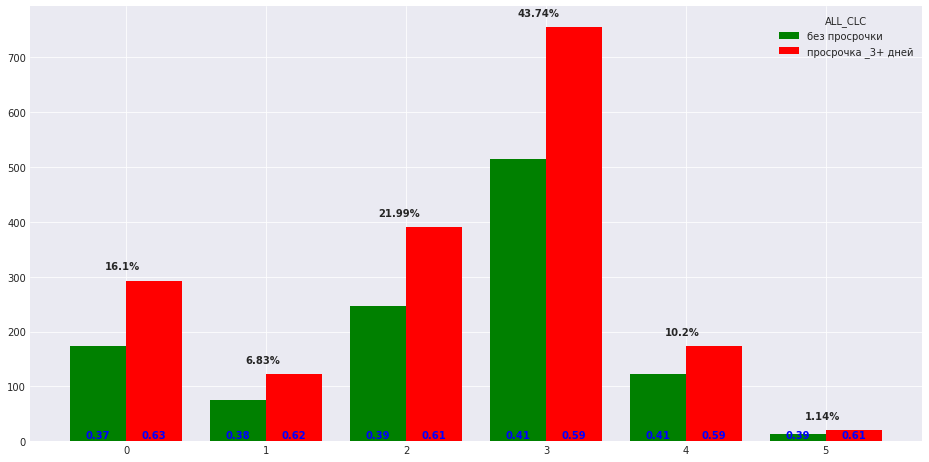

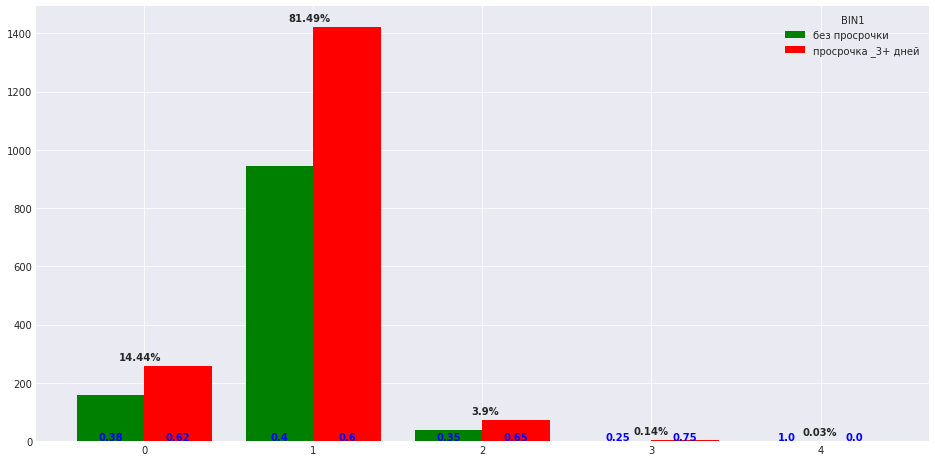

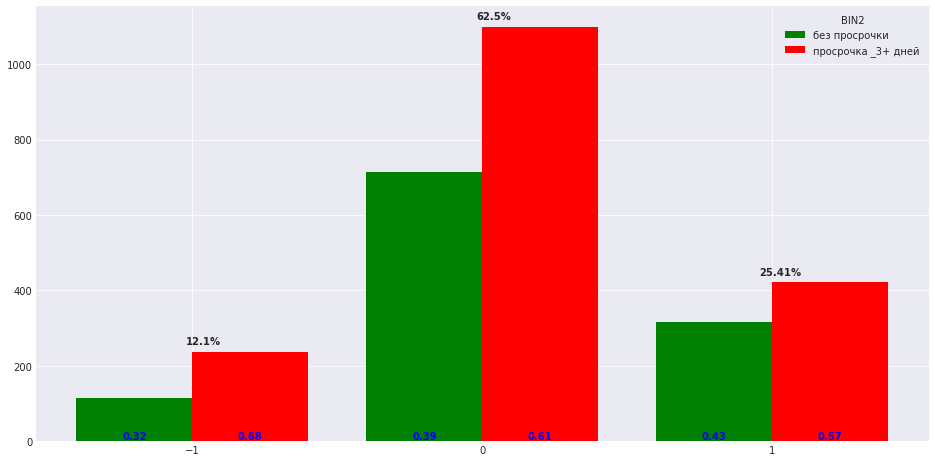

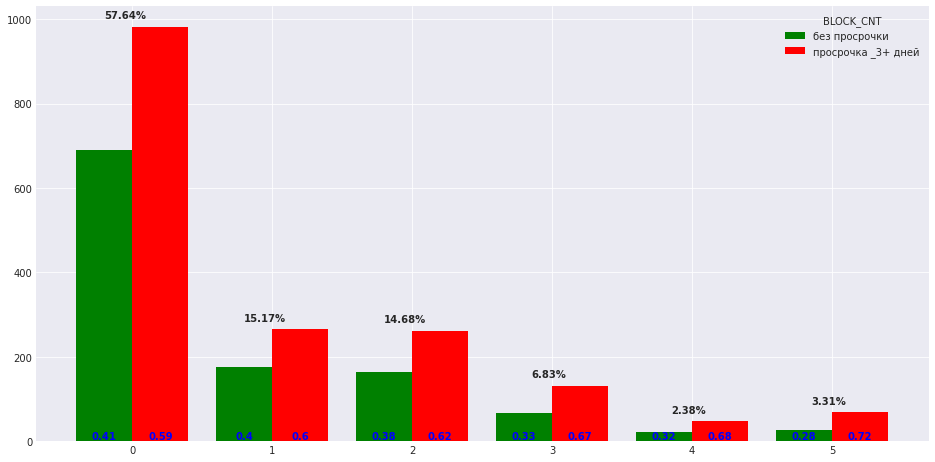

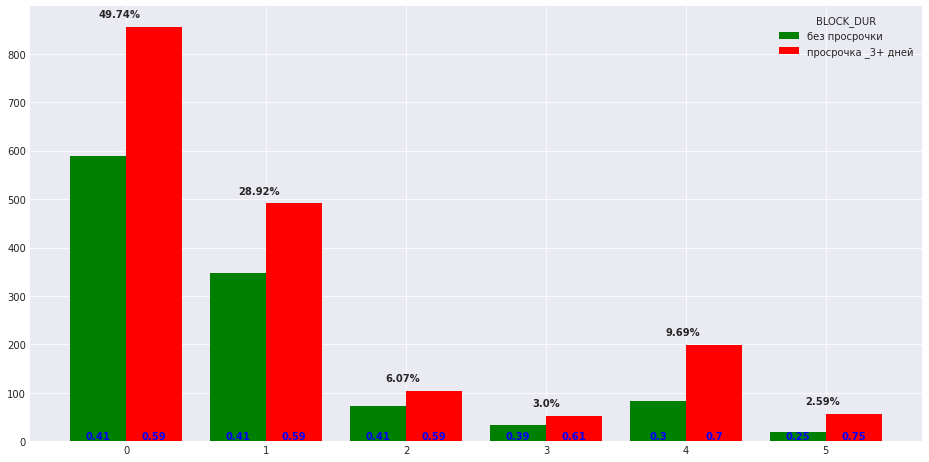

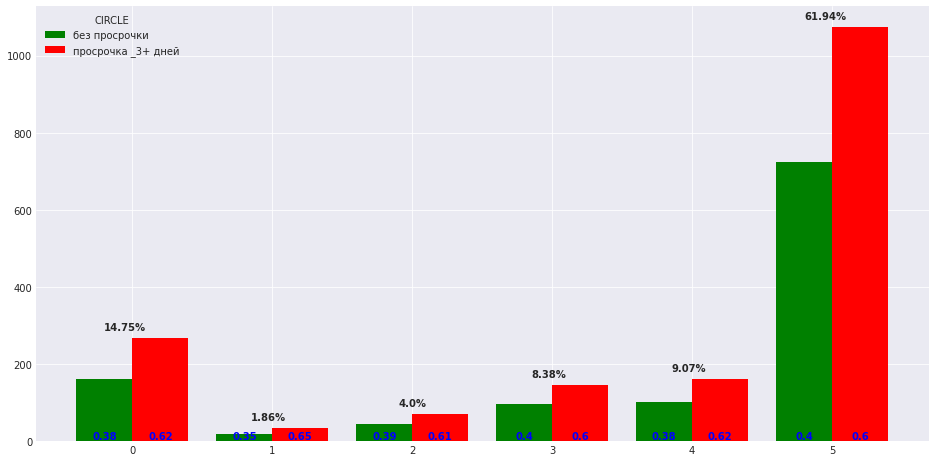

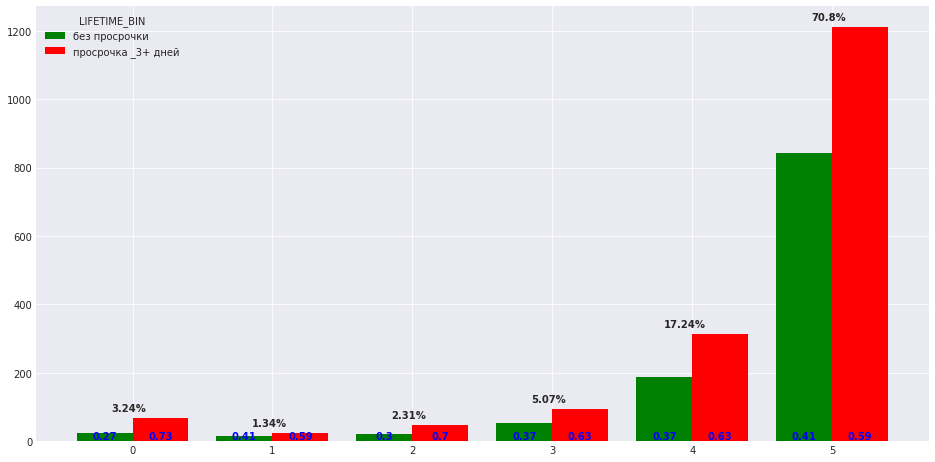

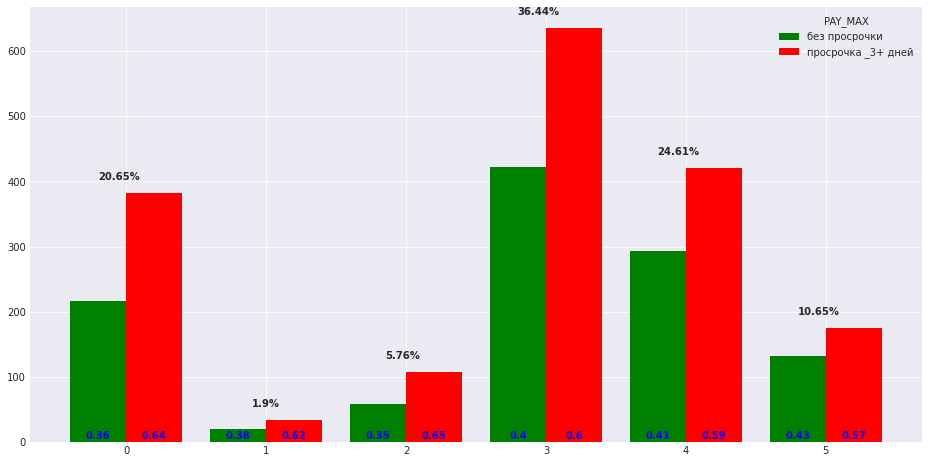

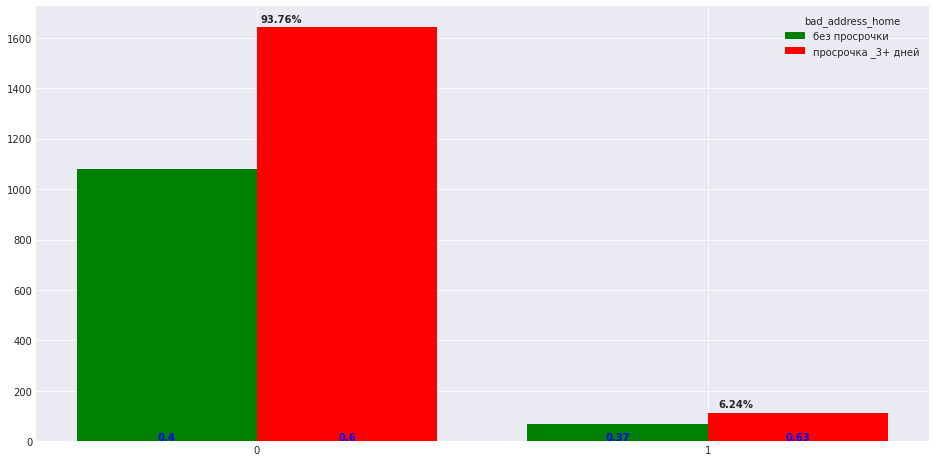

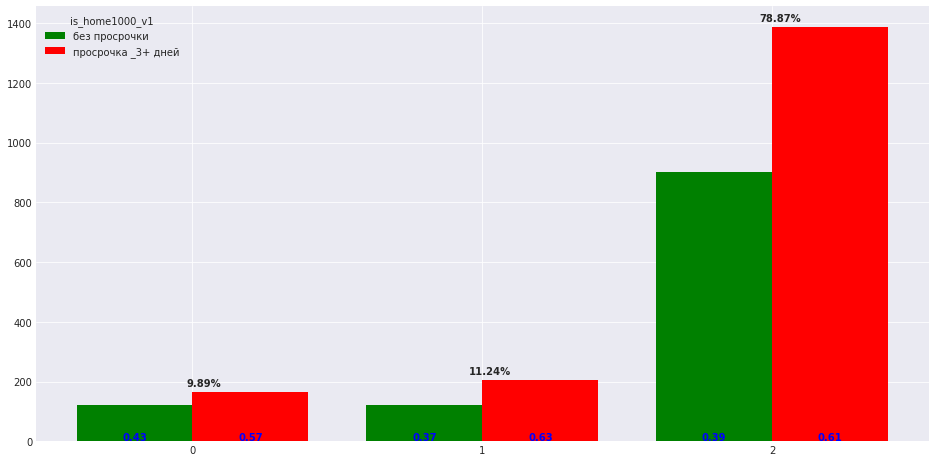

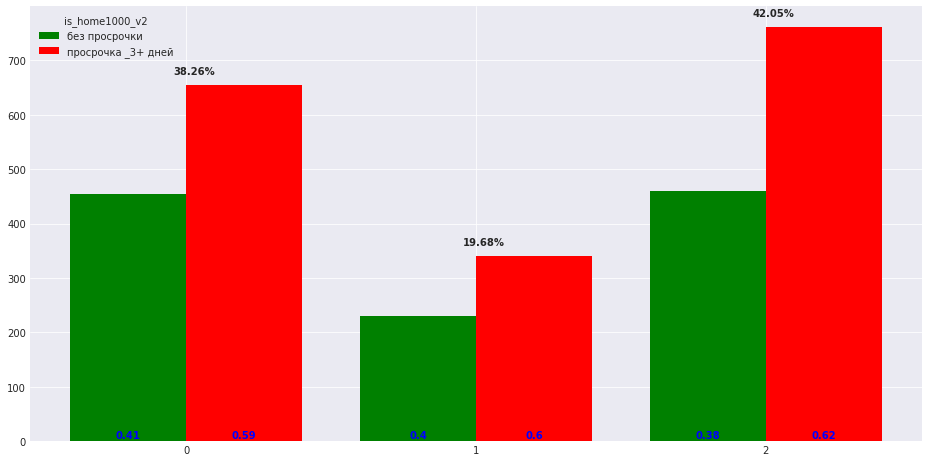

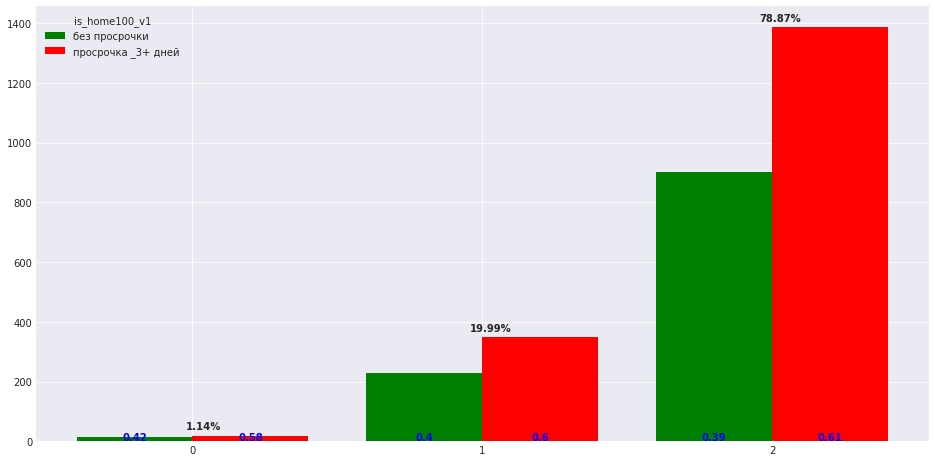

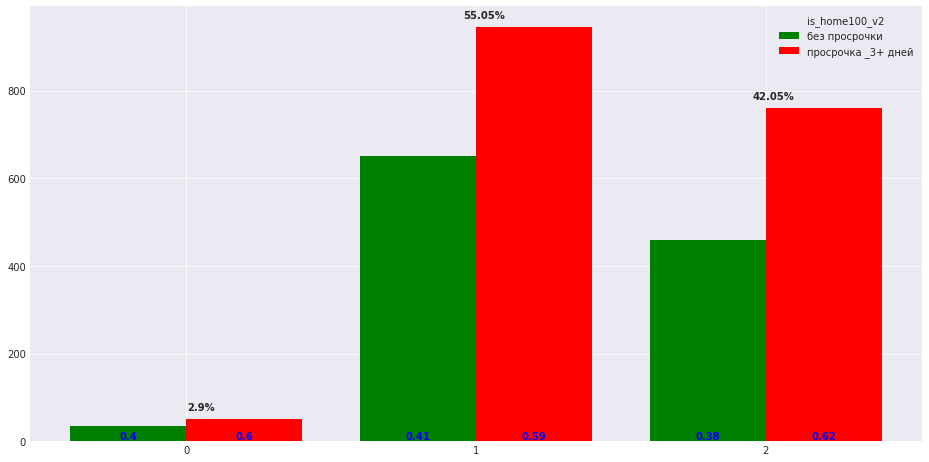

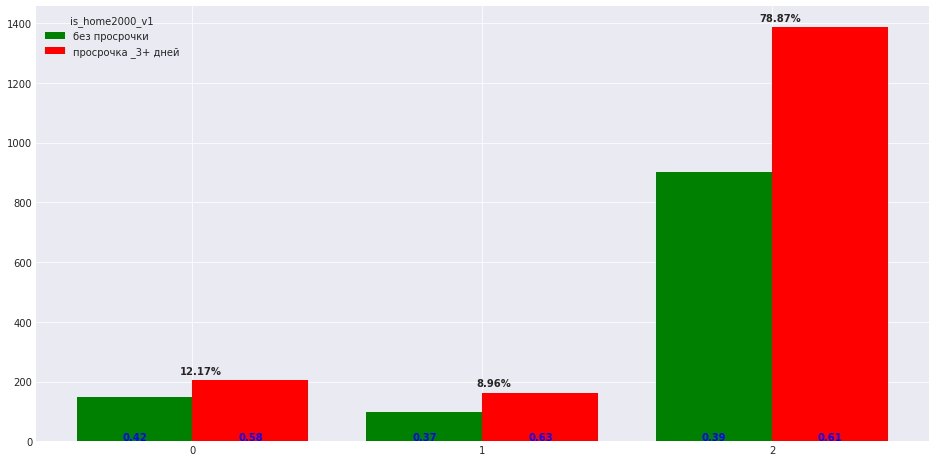

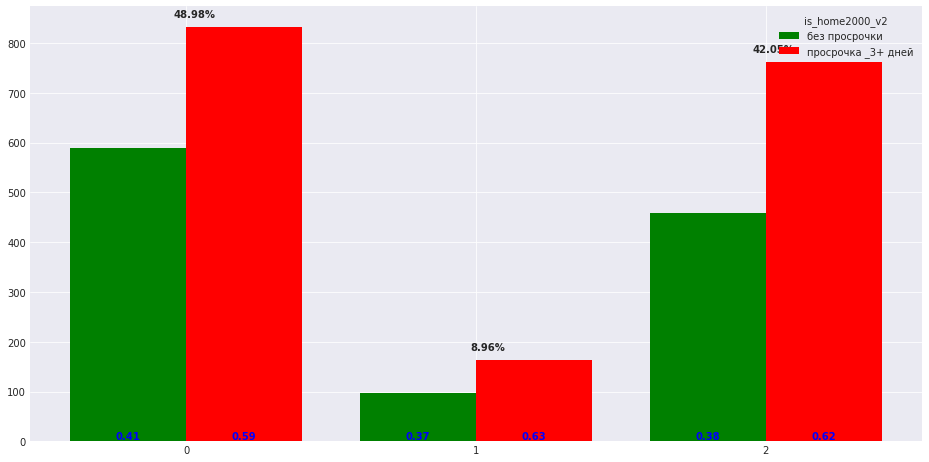

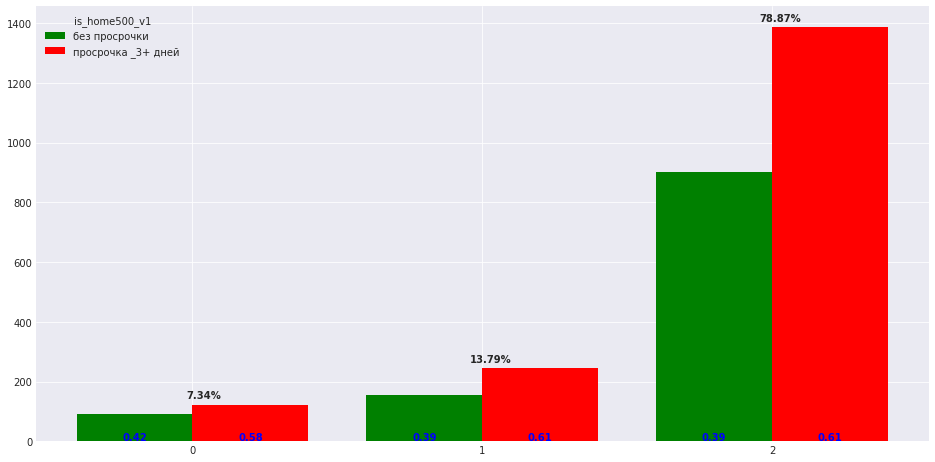

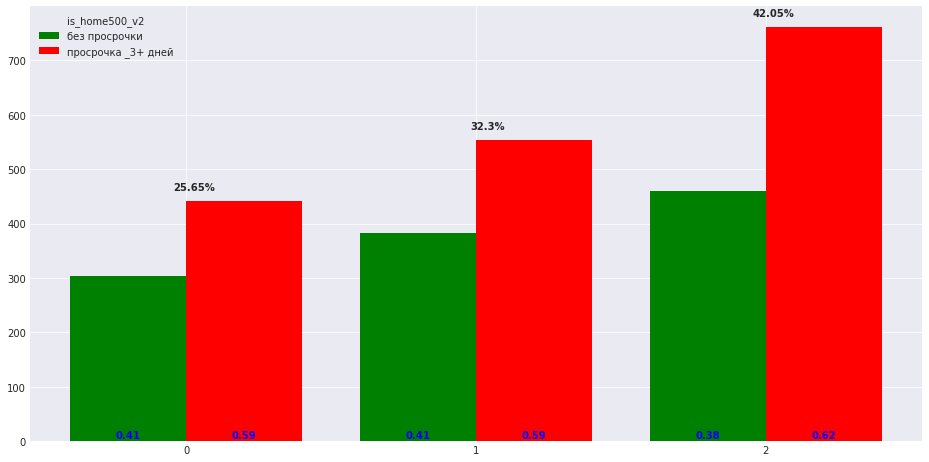

In [17]:
col = main_df.columns.drop(['app_id',current_status,'SCORE1', 'SCORE2', 'SCORE3','SCORE4', 'SCORE5'])
i = 0
n = len(list(col))
attributes = list(col)

for row in range(n):
    
    # текущий атрибут
    attr = attributes[i]
    
    # датафрейм текущего атрибута всех клиентов 
    data = main_df[attr].reset_index(drop=True)

    # значения текущего атрибута всех клиентов 
    column_values = data.values
    # список уникальных значений атрибута
    unique_values =  np.unique(column_values)

    # подсчитываем количество клиентов с одинаковыми значениями атрибута
    values_count = []

    for j in range(len(unique_values)):

        values_count.append(list(main_df[attr]).count(unique_values[j]))
    
    # подсчитываем количество клиентов с одинаковыми значениями атрибута и имеющими или не имеющими задолженность 3+
    val_cnt = np.empty((2, 0)).tolist()
    
    for j in range(len(unique_values)):
        val_cnt[0].append(list(main_df[main_df[current_status]==0][attr]).count(unique_values[j]))
        val_cnt[1].append(list(main_df[main_df[current_status]==1][attr]).count(unique_values[j]))



    total_loans = len(data)

    #вычисление процентов каждой колонки
    percentage = []
    for j in range(len(unique_values)):
        pct = (values_count[j] / total_loans) * 100
        percentage.append(round(pct,2))
    data['Percentage'] = percentage


    # ширина колонок
    width = 0.4 
    fig, ax = plt.subplots(figsize=(16,8))

    # строим график по клиентам без просрочки
    graph = ax.bar(unique_values - width/2,val_cnt[0],width, color='green', label='без просрочки')
    # строим график по клиентам с просрочкой 3+
    graph2 = ax.bar(unique_values + width/2,val_cnt[1],width, color='red', label=('просрочка '+str(current_status[-2:]))+'+ дней')


    j = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+5,
                 str(float("{:.2f}".format(val_cnt[0][j]/(val_cnt[0][j]+val_cnt[1][j])))),
                 ha='center',
                 weight='bold',
                 c='blue')
        j+=1
        
    j = 0
    for p in graph2:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+5,
                 str(float("{:.2f}".format(val_cnt[1][j]/(val_cnt[0][j]+val_cnt[1][j])))),
                 ha='center',
                 weight='bold',
                 c='blue')
        j+=1
    
    j = 0
    for p in graph2:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2-0.1,
                 y+height+20,
                 str(float("{:.2f}".format(data.Percentage[j])))+'%',
                 ha='right',
                 weight='bold')
        j+=1
   
    plt.legend(loc='best',title=attr)
    plt.xticks(unique_values)



    i+=1

        
plt.show() 


In [18]:
count_of_values = main_df[current_status].value_counts().sort_index().values
print('Без просрочки '\
      +str(float("{:.2f}".format(count_of_values[0]*100/(count_of_values[0]+count_of_values[1]))))\
      +'% людей')

print('Просрочка '\
      +str(current_status[-2:])+'+ дней '\
      +str(float("{:.2f}".format(count_of_values[1]*100/(count_of_values[0]+count_of_values[1]))))\
      +'% людей')


Без просрочки 39.47% людей
Просрочка _3+ дней 60.53% людей


**При исследовании графиков, можно сделать следующие выводы:**
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; 1. Будем считать, что изменение количества людей с тем или иным статусом на 20% от первоначального - есть признак аномалия. Тогда примерные пороговые значения для заёмщиков без просрочки: 0.316 (-20%) и 0.474 (+20%); Просрочка 3+ дней:  0.484 и 0.726. <br> 

&nbsp;&nbsp;&nbsp;&nbsp; 2. График BLOCK_CNT. Наблюдаем линейную зависимость между увеличением количества блокировок и увеличением процента просрочек с количеством блокировок от 10 раз и больше (суммарно 5.69%). Вывод: этот атрибут следует отобрать для анализа. <br> 

&nbsp;&nbsp;&nbsp;&nbsp; 3. График BLOCK_DUR. Наблюдаем линейную зависимость между увеличением количества блокировок и увеличением процента просрочек с длительностью блокировок от 3 суток и больше. Вывод: этот атрибут следует отобрать для анализа. <br> 

&nbsp;&nbsp;&nbsp;&nbsp; 4. График LIFETIME_BIN. Наблюдаем отрицательную линейную зависимость между увеличением длительности существования номера и уменьшением общего процента просрочек при диапазоне до 6 месяцев (суммарно 6.89%). Вывод: этот атрибут следует отобрать для анализа. <br> 


<br><br>

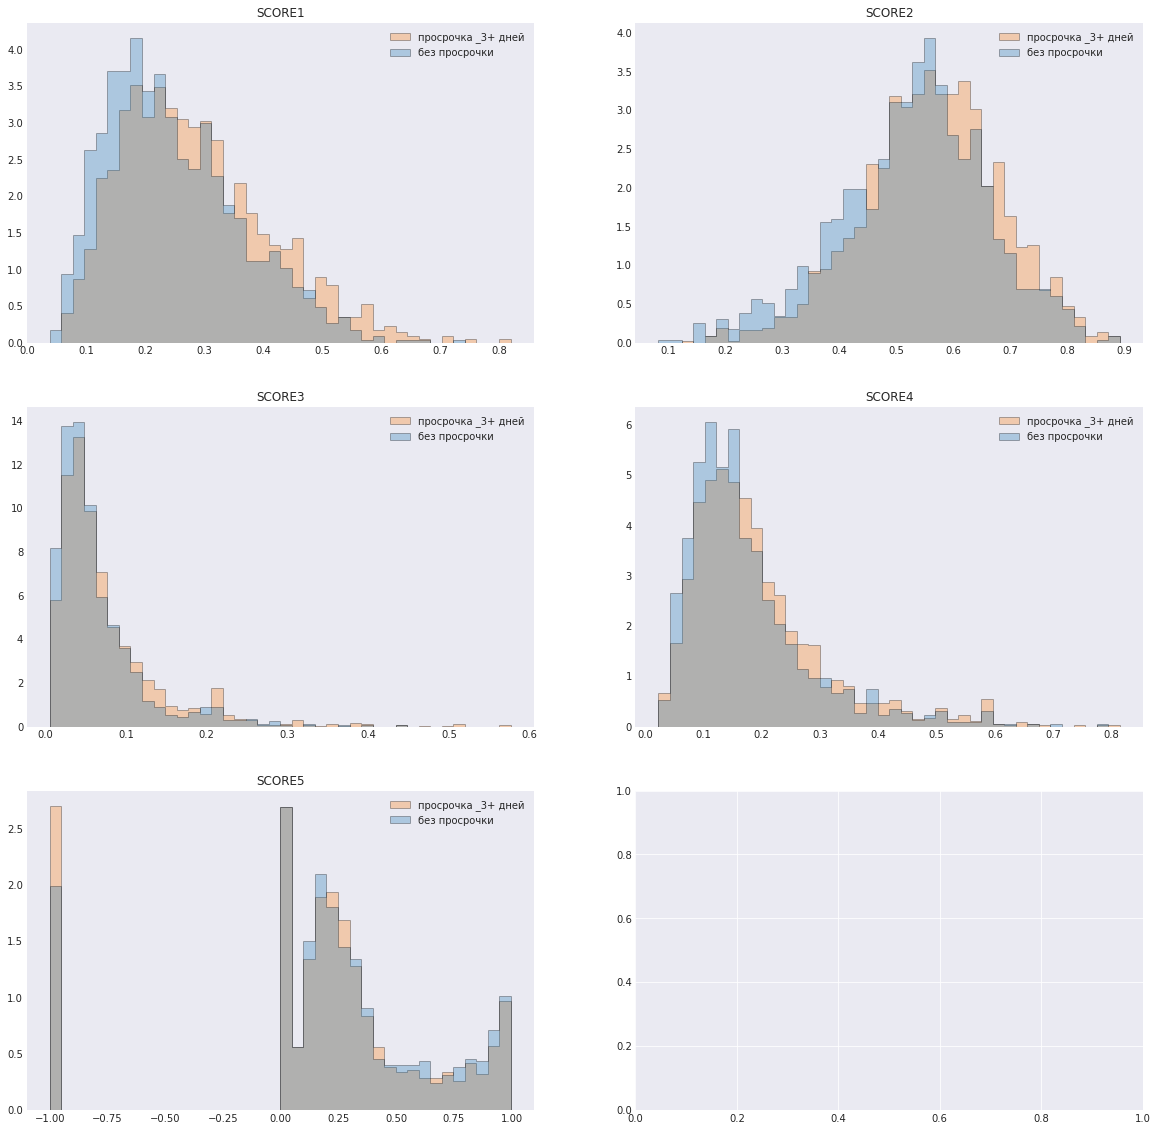

In [19]:
i = 0
attributes = ['SCORE1', 'SCORE2', 'SCORE3','SCORE4', 'SCORE5']
n = (len(list(attributes))+1)//2

fig, axes = plt.subplots(n, 2, figsize=(20,20))

for row in range(n):
    for column in range(2):
        
        plt.style.use('seaborn-white')
        

        attr = attributes[i]
        
        x1 = main_df[main_df[current_status]==0][attr]
        x2 = main_df[main_df[current_status]==1][attr]


        kwargs = dict(histtype='stepfilled', alpha=0.3,\
                      label=['без просрочки', (('просрочка '+str(current_status[-2:]))+'+ дней')], \
                      density=True, bins=40, ec="k")

        axes[row, column].hist([x1,x2], **kwargs)
        
        axes[row, column].grid()
        axes[row, column].legend(loc='best')
        axes[row, column].set_title(attr)
        
        i+=1
        if i==len(attributes):
            break
        
plt.show() 

**На графике SCORE1 наблюдается увеличение количества просрочек после 0.3. На графике SCORE2 наблюдается увеличение количества просрочек после 0.6. Вывод: повышение оценок SCORE1 и SCORE2 влияют на увеличение количества заёмщиков с просрочкой. Возможно, стоит поставить порог отсечения для снижения количества просрочек по этим параметрам на отметках 0.3 и 0.6 соответственно.**

In [20]:
expert = ['BLOCK_CNT','BLOCK_DUR', 'LIFETIME_BIN',  'SCORE1', 'SCORE2']

## Эксперт. Итог: BLOCK_CNT, BLOCK_DUR, LIFETIME_BIN, SCORE1, SCORE2

# Корреляционный анализ

In [21]:
# ограничиваем количество выводимых столбцов до 22
pd.options.display.max_columns = 22

# создаём общую таблицу корреляции
main_corr_matrix = main_df.drop(columns=['app_id']).corr()

coef_for_status = 0.05
coef_for_multicorr = 0.5

# создаём таблицу корреляции, где корреляция со статусом больше coef_for_status
corr_matrix = main_corr_matrix[abs(main_corr_matrix[current_status])>=coef_for_status]\
[list(main_corr_matrix[abs(main_corr_matrix[current_status])>=coef_for_status].index)]

# отбираем названия атрибутов, отсортированные по убыванию значений корреляции со статусом
attr_by_corr_status = corr_matrix.sort_values(current_status, ascending=False).index[1:]

# создаём таблицу кореляции, где и индекс, и колонки отсортированы по убыванию значений корреляции со статусом.
current_corr_matrix = corr_matrix.sort_values(current_status,ascending=False)[attr_by_corr_status][1:]

flag = True

# ходим по таблице и удаляем один из коррелирующих атрибутов до тех пор,
# пока корреляция между всеми атрибутами не будет меньше coef_for_multicorr
while flag:
    flag2 = False
    flag3 = False
    for i in current_corr_matrix.columns:
        for j in current_corr_matrix.columns:
            if (abs(current_corr_matrix[i][j])>=coef_for_multicorr) & (i!=j):
                print('Сравниваем '+i+'='\
                      +str(corr_matrix[current_status][i])+' и '\
                      +j+'='+str(corr_matrix[current_status][j]))
                
                if abs(corr_matrix[current_status][i]) < abs(corr_matrix[current_status][j]):
                    print('Удаляем '+i+'='+str(corr_matrix[current_status][i]))
                    current_corr_matrix.drop(i, axis=1, inplace=True)
                    current_corr_matrix.drop(i, axis=0, inplace=True)
                    flag2=True
                else:
                    print('Удаляем '+j+'='+str(corr_matrix[current_status][j]))
                    current_corr_matrix.drop(j, axis=1, inplace=True)
                    current_corr_matrix.drop(j, axis=0, inplace=True)
                    flag2=True
                print() 
            if flag2:
                break
        if flag2:
                break
                
    # ещё раз проходим по матрице для поиска атрибутов, корреляция которых больше coef_for_multicorr       
    for i in current_corr_matrix.columns:
        for j in current_corr_matrix.columns:
            if (abs(current_corr_matrix[i][j])>=coef_for_multicorr) & (i!=j):
                flag3=True
            if flag3:
                break
        if flag3:
            break 
    if flag3:
        continue
    
    flag = False
    
current_corr_matrix

Сравниваем SCORE1=0.14907013004566724 и SCORE2=0.1265158956162356
Удаляем SCORE2=0.1265158956162356

Сравниваем SCORE3=0.09345119735779199 и SCORE5=-0.05618574793450444
Удаляем SCORE5=-0.05618574793450444

Сравниваем SCORE3=0.09345119735779199 и LIFETIME_BIN=-0.059347419700151886
Удаляем LIFETIME_BIN=-0.059347419700151886

Сравниваем BLOCK_DUR=0.071339906230697 и BLOCK_CNT=0.06365229638148116
Удаляем BLOCK_CNT=0.06365229638148116



,SCORE1,SCORE3,SCORE4,BLOCK_DUR,BIN2
SCORE1,1.000000,0.415320,0.224288,0.239582,-0.222393
SCORE3,0.415320,1.000000,0.413445,0.094898,-0.488201
SCORE4,0.224288,0.413445,1.000000,0.014127,-0.236400
BLOCK_DUR,0.239582,0.094898,0.014127,1.000000,0.033479
BIN2,-0.222393,-0.488201,-0.236400,0.033479,1.000000


In [22]:
corr_matrix.sort_values(current_status, ascending=False)[corr_matrix.sort_values(current_status, ascending=False).index]

,status_3,SCORE1,SCORE2,SCORE3,SCORE4,BLOCK_DUR,BLOCK_CNT,SCORE5,BIN2,LIFETIME_BIN
status_3,1.000000,0.149070,0.126516,0.093451,0.076499,0.071340,0.063652,-0.056186,-0.058574,-0.059347
SCORE1,0.149070,1.000000,0.662762,0.415320,0.224288,0.239582,0.307428,-0.251163,-0.222393,-0.282730
SCORE2,0.126516,0.662762,1.000000,0.250532,0.135007,0.168272,0.236304,-0.099400,-0.086987,-0.130806
SCORE3,0.093451,0.415320,0.250532,1.000000,0.413445,0.094898,0.093564,-0.577585,-0.488201,-0.647515
SCORE4,0.076499,0.224288,0.135007,0.413445,1.000000,0.014127,0.024506,-0.296650,-0.236400,-0.434028
BLOCK_DUR,0.071340,0.239582,0.168272,0.094898,0.014127,1.000000,0.867167,0.034297,0.033479,0.057691
BLOCK_CNT,0.063652,0.307428,0.236304,0.093564,0.024506,0.867167,1.000000,0.045882,0.036573,0.049767
SCORE5,-0.056186,-0.251163,-0.099400,-0.577585,-0.296650,0.034297,0.045882,1.000000,0.848932,0.764210
BIN2,-0.058574,-0.222393,-0.086987,-0.488201,-0.236400,0.033479,0.036573,0.848932,1.000000,0.634063
LIFETIME_BIN,-0.059347,-0.282730,-0.130806,-0.647515,-0.434028,0.057691,0.049767,0.764210,0.634063,1.000000


In [23]:
corr_anal = list(current_corr_matrix.columns)
corr_anal

['SCORE1', 'SCORE3', 'SCORE4', 'BLOCK_DUR', 'BIN2']

## Корреляционный анализ. Итог: 'SCORE1', 'SCORE3', 'SCORE4', 'BLOCK_DUR', 'BIN2'

# ML-методы

In [24]:
# получаем атрибуты
X = main_df.drop(columns=['app_id', current_status])

# получаем статусы
y = main_df[current_status]

# увеличиваем значения 'BIN2' на 1, т.к. для тренировки модели X должен быть неотрицательным
X['BIN2'] += 1
# заменяем отрицательные значения 'SCORE5' на 0, т.к. для тренировки модели X должен быть неотрицательным,
# а вероятность совпадения ДР при отсутствии данных по сути нулевая 
X[X['SCORE5']==-1] = 0

# отбираем категариальные атрибуты
X_cat = X.drop(columns=['SCORE1', 'SCORE2', 'SCORE3', 'SCORE4', 'SCORE5'])

# отбираем числовые атрибуты
X_num = X.drop(columns=list(X_cat.columns))

## RFE

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math

In [26]:
# создаём модель
model = LogisticRegression(max_iter=1000)

max_accurancy = 0

for i in range(1,math.ceil(len(X_num.columns))):
    
    # создаём экземпляр модели
    rfe = RFE(model, n_features_to_select=i)
    
    # разбиваем выборку на тренировочную и тестовую
    X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.3)

    # обучаем модель
    fit = rfe.fit(X_train, y_train)
    
    # предсказываем данные
    y_pred = rfe.predict(X_test)
    
    # вычисляем точность предсказания
    if sum(y_pred == y_test) / len(y_test) > max_accurancy:
        max_accurancy = sum(y_pred == y_test) / len(y_test)
        n = i

# создаём модель с лучшими по статистике параметрами        
rfe = RFE(model, n_features_to_select=n)
# обучаем модель
fit = rfe.fit(X_num, y);    

In [27]:
print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)

Число признаков: 1
Выбранные признаки: [ True False False False False]
Ранг признаков: [1 2 4 5 3]


In [28]:
features_RFE = []

#отбираем признаки, чей рейтинг равен 1
for i in range(len(fit.feature_names_in_)):
    if fit.ranking_[i]==1:
        features_RFE.append(fit.feature_names_in_[i])

print(features_RFE)

['SCORE1']


# Альтернативные методы отбора признаков

## SelectKBest

In [29]:
# https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection

from sklearn.feature_selection import SelectKBest, chi2

In [30]:
# строим модель. В качестве скорринговой функции используем chi2
selector = SelectKBest(chi2)

# тренируем модель
selector.fit(X_cat.to_numpy(), y)

# получаем индексы 
cols = selector.get_support(indices=True)

# отбираем названия атрибутов по индексу
features_SelectKBest = []

# берём максимальную оценку
max_score = selector.scores_[cols].max()

# отбираем те атрибуты, оценка которых больше или равна половины максимальной оценки среди атрибутов
for i in range(len(selector.scores_)):
    if selector.scores_[i] >= (max_score/2):
        features_SelectKBest.append(X_cat.columns[i])

# выводим отобранные атрибуты
print(features_SelectKBest)


['ALL_CLC', 'BLOCK_CNT', 'BLOCK_DUR', 'CIRCLE', 'PAY_MAX']


**Судя по всему, алгоритм SelectKBest использует скоринг для оценки важности атрибута, и чем выше оценка, тем первоочерёднее атрибут попадёт в финальную выборку.**

## SelectPercentile

In [31]:
# https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection

from sklearn.feature_selection import SelectPercentile

In [32]:
# строим модель. В качестве скорринговой функции используем chi2
selector = SelectPercentile(chi2)

# тренируем модель
selector.fit(X_cat.to_numpy(), y)

# получаем индексы 
cols = selector.get_support(indices=True)

# отбираем названия атрибутов по индексу
features_SelectPercentile = []

# берём максимальную оценку
max_score = selector.scores_[cols].max()

# отбираем те атрибуты, оценка которых больше или равна половины максимальной оценки среди атрибутов
for i in range(len(selector.scores_)):
    if selector.scores_[i] >= (max_score/2):
        features_SelectPercentile.append(X_cat.columns[i])

# выводим отобранные атрибуты
print(features_SelectPercentile)


['ALL_CLC', 'BLOCK_CNT', 'BLOCK_DUR', 'CIRCLE', 'PAY_MAX']


**При использовании алгоритма отбора признаков SelectPercentile результаты не поменялись относительно SelectKBest. Вся разница между методами заключается лишь в том, что при SelectKBest мы можем указать конкретное количество желаемых атрибутов, а при SelectPercentile - процент от общего количества атрибутов.**

## Mutual information

In [33]:
# https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection

from sklearn.feature_selection import mutual_info_classif

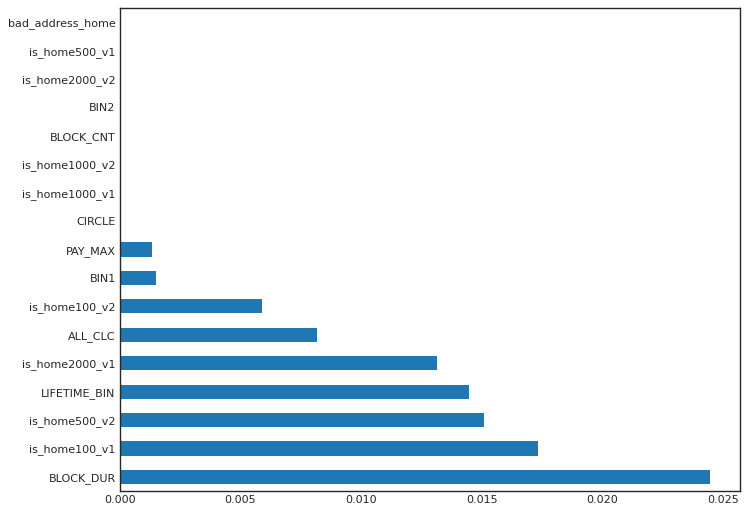

In [34]:
# строим и обучаем классификатор взаимности переменных 
importances = mutual_info_classif(X_cat.to_numpy(),y)

# соотносим показатели важности с именами атрибутов
feat_importances = pd.Series(importances, X_cat.columns)

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

# визуализируем степени важности
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [35]:
# создаём список из атрибутов, чья степень важности больше нуля
list_of_features = list(feat_importances.nlargest(24)[feat_importances>0].index)

'''
# удаляем скоринговые баллы
list_to_remove = []
for i in list_of_features:
    if ('SCORE' in i):
        list_to_remove.append(i)

for i in list_to_remove:
    list_of_features.remove(i)

print('Удаляем следующие атрибуты:')
print(list_to_remove)
'''

print('Остались следующие атрибуты:')
print(list_of_features)


Остались следующие атрибуты:
['BLOCK_DUR', 'is_home100_v1', 'is_home500_v2', 'LIFETIME_BIN', 'is_home2000_v1', 'ALL_CLC', 'is_home100_v2', 'BIN1', 'PAY_MAX']


**При использовании mutual_info_classif с каждым запуском алгоритма остаются разные атрибуты. Вероятно, это происходит потому что при обучении модели с помощью mutual_info_classif в некоторых местах используются псевдослучайные числа.**

##  Fisher Score

In [36]:
# https://programtalk.com/python-examples/skfeature.function.similarity_based.fisher_score.fisher_score/

from skfeature.function.similarity_based import fisher_score

In [37]:
# оцениваем все атрибуты по степени важности
score = fisher_score.fisher_score(X_cat.to_numpy(), y)
features_fisher_score = []

# отбираем топ-3 атрибутов по важности 
for i in range(len(score)):
    if score[i]<=3:
        features_fisher_score.append(X_cat.columns[i])

# выводим отобранные атрибуты
print('Cогласно оценке наиболее важными категориальными переменными оказались:')
print(features_fisher_score)

Cогласно оценке наиболее важными категориальными переменными оказались:
['bad_address_home', 'is_home1000_v2', 'is_home2000_v1', 'is_home2000_v2']


## ANOVA F-value

In [38]:
from sklearn.feature_selection import f_classif

In [39]:
selector = SelectKBest(f_classif, k=4)

# тренируем модель
selector.fit(X_cat.to_numpy(), y)

# получаем индексы 
cols = selector.get_support(indices=True)

# отбираем названия атрибутов по индексу
features_ANOVA = []

# берём максимальную оценку
max_score = selector.scores_[cols].max()

# отбираем те атрибуты, оценка которых больше или равна четверти максимальной оценки среди атрибутов
for i in range(len(selector.scores_)):
    if selector.scores_[i] >= (max_score/4):
        features_ANOVA.append(X_cat.columns[i])

# выводим отобранные атрибуты
print(features_ANOVA)


['ALL_CLC', 'BIN2', 'BLOCK_CNT', 'BLOCK_DUR', 'CIRCLE', 'LIFETIME_BIN', 'PAY_MAX', 'is_home100_v1', 'is_home500_v1']


## RandomForestClassifier

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [41]:
# стандартизируем функции, удалив среднее значение и масштабируя до единичной дисперсии
X2 = StandardScaler().fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

# создаём экземпляр классификатора
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# обучаем модель
clf.fit(X2, y)

#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)


RandomForestClassifier(random_state=0)

<AxesSubplot:>

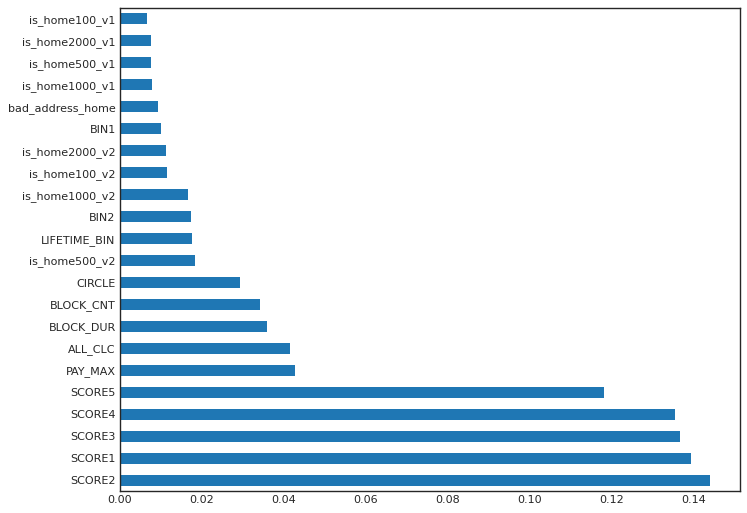

In [42]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(24).plot(kind='barh')

**При использовании алгоритма случайного леса атрибутами с самой высокой важностью оказались все атрибуты 'SCORE'**

In [43]:
RandomForest_result = list(feat_importances.nlargest(24)[0:5].index)
RandomForest_result

['SCORE2', 'SCORE1', 'SCORE3', 'SCORE4', 'SCORE5']

# Forward Selection 

In [44]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [45]:

feature_names = []
best_feature_names_Forward = []
score = 1

# итерационно подбираем лучшее значение k_features
for i in range(0,int(len(X_num.columns))):
    # создаём экземпляр классификатора
    sfs1 = SFS(RandomForestRegressor(),
               k_features=i+1,
               forward=True, 
               floating=False, 
               verbose=False,
               scoring='r2',
               cv=3,
               n_jobs=-1
                )

    # обучаем модель
    fit = sfs1.fit(X_num, y)

    # список имён отобранных атрибутов
    feature_names_Forward = X_num.columns[list(fit.k_feature_idx_)]
    
    # значения fit.k_score_ по некой причине получаются все отрицательными, поэтому опытным путём выяснил,
    # что с увеличением количества атрибутов этот показатель ещё активнее уменьшается.
    # Вывод: самое максимальное значение fit.k_score_ соответствует лучшей выборке
    if abs(fit.k_score_) < score:
        score = abs(fit.k_score_)
        best_feature_names_Forward = feature_names_Forward
    

In [46]:
list(best_feature_names_Forward)

['SCORE1', 'SCORE2', 'SCORE3', 'SCORE4']

**Если подбирать количество требуемых атрибутов, то даже при n_jobs=-1 алгоритм расходует много памяти**

# Backward Elimination

In [47]:

feature_names = []
best_feature_names_Backward = []
score = 1

# итерационно подбираем лучшее значение k_features
for i in range(0,int(len(X_num.columns))):
    # создаём экземпляр классификатора
    sfs1 = SFS(RandomForestRegressor(),
               k_features=i+1,
               forward=False, 
               floating=False, 
               verbose=False,
               scoring='r2',
               cv=3,
               n_jobs=-1
                )

    # обучаем модель
    fit = sfs1.fit(X_num, y)

    # список имён отобранных атрибутов
    feature_names_Backward = X_num.columns[list(fit.k_feature_idx_)]
    
    # значения fit.k_score_ по некой причине получаются все отрицательными, поэтому опытным путём выяснил,
    # что с увеличением количества атрибутов этот показатель ещё активнее уменьшается.
    # Вывод: самое максимальное значение fit.k_score_ соответствует лучшей выборке
    if abs(fit.k_score_) < score:
        score = abs(fit.k_score_)
        best_feature_names_Backward = feature_names_Backward
    

In [48]:
list(best_feature_names_Backward)

['SCORE1', 'SCORE2', 'SCORE3', 'SCORE4', 'SCORE5']

**Выполнение Backward Elimination ещё более затратно по памяти**

# Подсчёт статистики

In [49]:
result_df = pd.DataFrame(index=(list(main_corr_matrix.drop(columns=current_status).columns)), columns=['count'])
result_df.fillna(int(0), inplace=True)


for i in features_RFE:
    result_df['count'][i] += 1
for i in features_fisher_score:
    result_df['count'][i] += 1
for i in corr_anal:
    result_df['count'][i] += 1
for i in expert:
    result_df['count'][i] += 1
for i in features_SelectKBest:
    result_df['count'][i] += 1

'''
for i in best_feature_names_Forward:
    result_df['count'][i] += 1
for i in best_feature_names_Backward:
    result_df['count'][i] += 1
for i in RandomForest_result:
    result_df['count'][i] += 1
for i in features_ANOVA:
    result_df['count'][i] += 1



'''
result_df


,count
ALL_CLC,1
BIN1,0
BIN2,1
BLOCK_CNT,2
BLOCK_DUR,3
CIRCLE,1
LIFETIME_BIN,1
PAY_MAX,1
SCORE1,3
SCORE2,1


In [50]:
print('Отобранные атрибуты:')
result_df[result_df['count']==result_df['count'].max()]

Отобранные атрибуты:


,count
BLOCK_DUR,3
SCORE1,3


## Эксперт. Итог:  BLOCK_CNT, BLOCK_DUR, LIFETIME_BIN, SCORE1, SCORE2

## Машина. Итог: ALL_CLC, BLOCK_CNT, BLOCK_DUR, CIRCLE, PAY_MAX, , SCORE1, SCORE2, bad_address_home, is_home1000_v2, is_home2000_v1, is_home2000_v2

## Корреляционный анализ. Итог: SCORE1,	SCORE3,	BLOCK_DUR,	SCORE4,	

 # Общий итог: SCORE1,	BLOCK_DUR